In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
df=pd.read_excel('Shortlisted Reports (1).xlsx')
df = df[['Recommendation Text']]
df.columns = ['Text']

In [ ]:
df.head()

,Text
0,The following steps focus on specific actions ...
1,Best Practices and Standards Recommendations\n...
2,Recommendation: Protect the Nuclear Strike as ...
3,Recommended Approach and Policy Actions\nThe D...
4,The VCAT wants to take this opportunity to com...


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df['Text']=df['Text'].str.replace('[{}]'.format(string.punctuation), '')
df['Text']=df['Text'].str.lower()
df['Text'] = df['Text'].astype(str)
df['Text'] = df['Text'].apply(word_tokenize)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Text
0,"[the, following, steps, focus, on, specific, a..."
1,"[best, practices, and, standards, recommendati..."
2,"[recommendation, protect, the, nuclear, strike..."
3,"[recommended, approach, and, policy, actions, ..."
4,"[the, vcat, wants, to, take, this, opportunity..."


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('cyber')
stopwords.append('security')
stopwords.append('cybersecurity')

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

df['Text']= df['Text'].apply(lambda x:remove_stopwords(x))

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['Text']=df['Text'].apply(lambda x:lemmatizer(x))

In [ ]:
df['Text']

0     [following, step, focus, specific, action, tak...
1     [best, practice, standard, recommendation, fol...
2     [recommendation, protect, nuclear, strike, det...
3     [recommended, approach, policy, action, dod, m...
4     [vcat, want, take, opportunity, commend, nist,...
5     [’, time, change, proposal, reform, solution, ...
6     [ii, need, enhanced, civilmilitary, coordinati...
7     [federal, agency, need, effectively, implement...
8     [summary, major, finding, storm, yielded, eigh...
9     [four, overarching, storm, ii, objective, exam...
10    [information, gathered, throughout, exercise, ...
11                                                [nan]
12    [several, commercial, practice, informative, u...
13                                                [nan]
14    [pilot, deployment, assessment, purpose, hyper...
15    [following, key, research, development, sugges...
16    [suggested, practice, enable, default, unique,...
17    [strategic, goal, build, maintain, ready, 

## WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
ltext=''
for t in df['Text'].to_numpy():
  ltext += ' '.join(t)

In [ ]:
ltext

'following step focus specific action taken increase scada network 1 identify connection scada network conduct thorough risk analysis ass risk necessity connection scada network develop comprehensive understanding connection scada network well connec tions protected identify evaluate following type connection • internal local area wide area network including business network • internet • wireless network device including satellite uplink • modem dialup connection • connection business partner vendor regulatory agency 2 disconnect unnecessary connection scada network ensure highest degree scada system isolate scada network network connection great degree possible connection another network introduces risk partic ularly connection creates pathway internet although direct connection net work may allow important information passed efficiently conveniently insecure connection sim ply worth risk isolation scada network must primary goal provide needed protection strategy utilization “ demili

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(ltext)

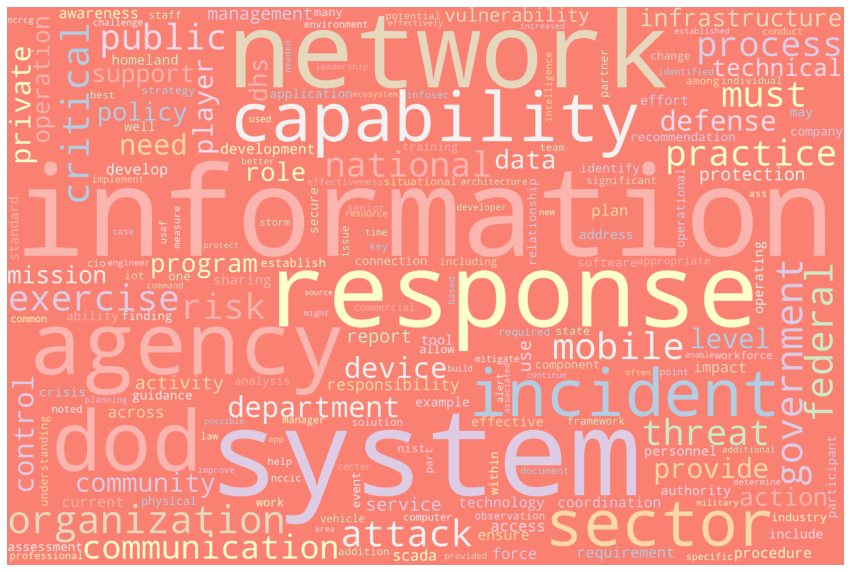

In [ ]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

plot_cloud(wordcloud)

## Sentence embeddings

In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.7 MB/s 
     |████████████████████████████████| 4.7 MB 14.5 MB/s 
     |████████████████████████████████| 1.3 MB 55.9 MB/s 
     |████████████████████████████████| 101 kB 9.3 MB/s 
     |████████████████████████████████| 596 kB 51.8 MB/s 
     |████████████████████████████████| 6.6 MB 40.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e46d591cc042e0c83f5a467ecb8e99967cff11f01b76655bf74f2d45bd73dcff
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import seaborn as sns
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
df=pd.read_excel('Shortlisted Reports (1).xlsx')
df = df.dropna()
df = df[['Recommendation Text']]
df.columns = ['Text']
sentences = df['Text'].to_numpy()
sentence_embeddings = sbert_model.encode(sentences)

In [ ]:
sentence_embeddings.shape

(18, 768)

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

matrix = np.identity(sentence_embeddings.shape[0])
for i in range(matrix.shape[0]):
  for j in range(i,matrix.shape[0]):
    matrix[i][j] = cosine(sentence_embeddings[i],sentence_embeddings[j])
    matrix[j][i] = matrix[i][j]

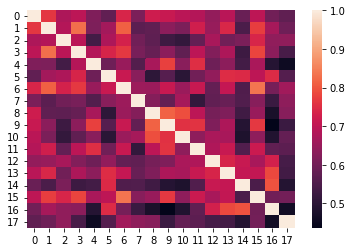

In [ ]:
ax = sns.heatmap(matrix)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(sentence_embeddings)

KMeans(n_clusters=2)

(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

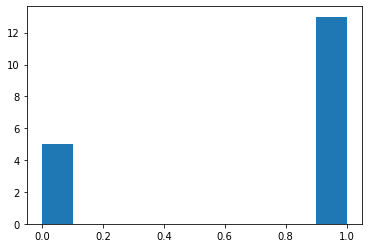

In [ ]:
plt.hist(Kmean.labels_)